# Check working of Gaussian processes to classify data

In [1]:
from sklearn.datasets import make_classification, make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
cm = cmap=plt.cm.RdBu

# Load dataset, preprocess, split

In [2]:
# Load dataset
X, y = make_moons(n_samples=1000, noise=0.1)

In [3]:
# Preprocess dataset
X_scaled = StandardScaler().fit_transform(X)

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)

# Show whole dataset

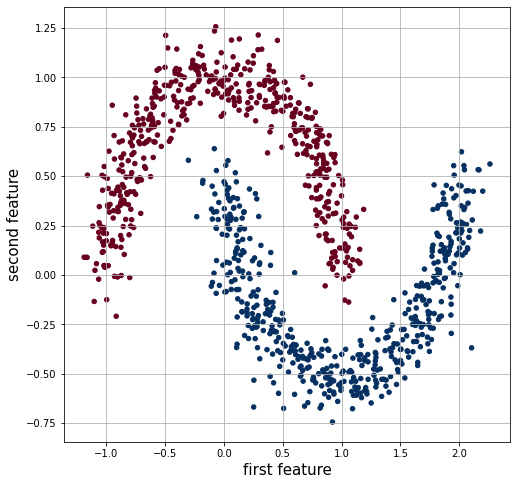

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(x=X[:, 0], y=X[:, 1], s=20, c=y, cmap=cm)
plt.grid(True)
plt.xlabel('first feature', fontdict={'fontsize': 15})
plt.ylabel('second feature', fontdict={'fontsize': 15})
plt.show()

# Test built-in sklearn Gaussian Process Classifier

In [6]:
gauss_clf = GaussianProcessClassifier()

In [7]:
gauss_clf.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

In [8]:
pred = gauss_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

In [9]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9757575757575757


# Show classification on surface containing dataset, not only on dataset points

In [10]:
first_feature = np.linspace(X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1, 100).reshape(-1, 1)
second_feature = np.linspace(X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1, 100).reshape(-1, 1)

In [11]:
xx, yy = np.meshgrid(first_feature, second_feature)

In [12]:
X_surface = np.hstack((xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1)))
# X_surface = np.c_[xx.flatten(), yy.flatten()] # Same result with this command ;)

In [13]:
pred_mesh = gauss_clf.predict_proba(X_surface)

In [14]:
pred_mesh = pred_mesh[:, 1] # extract probablity only for second class (we have only 2 classes)

In [15]:
pred_mesh = pred_mesh.reshape(xx.shape)

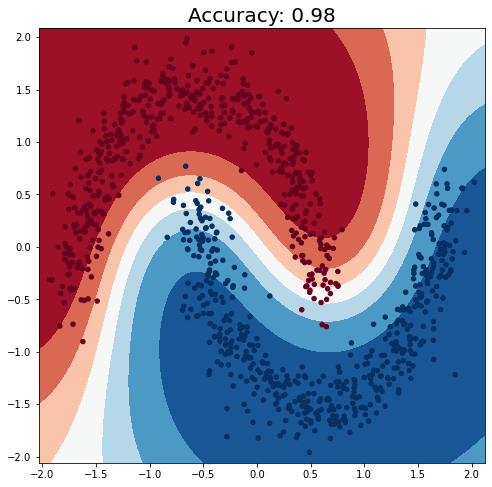

In [16]:
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, pred_mesh, cmap=cm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=20, cmap=cm)
plt.title(f'Accuracy: {accuracy:.2f}', fontdict={'fontsize': 20})
plt.show()